###Karla González Sánchez | A01541526

In [ ]:
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import f
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/estadistica/breast_cancer.csv')

Utiliza un modelo de regresión lineal múltiple para predecir el radio del tumor. Las variables regresoras de tu modelo deben de ser todas las variables de la base de datos.

##1.- Base de datos completa. No se observan valores faltantes.
En caso de haberlos se realiza imputación simple.

In [ ]:
df.rename(columns={'concave points_mean':'concave_points_mean'}, inplace=True)
df.rename(columns={'concave points_se':'concave_points_se'}, inplace=True)
df.rename(columns={'concave points_worst':'concave_points_worst'}, inplace=True)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


No se observan valores faltantes, por lo que no es necesario llevar a cabo imputación.

In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Dado que tenemos variables categóricas, las vamos a convertir en numéricas.

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
dummies = pd.get_dummies(df['diagnosis'], prefix = 'diagnosis')

In [ ]:
dummies

,diagnosis_B,diagnosis_M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
564,0,1
565,0,1
566,0,1
567,0,1


In [ ]:
df = pd.concat([df, dummies], axis = 1)

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,1


In [ ]:
df.drop('diagnosis', axis=1, inplace=True)

##2.-Mostrar que las variables regresoras son independientes.
En caso de no serlo realizar el procedimiento correspondiente.

In [ ]:
correlacion = df.corr()

In [ ]:
alta_corr = np.where((correlacion > 0.95) & (correlacion < 1))

In [ ]:
correlacion

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,-0.039769,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360,0.696360
concave_points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499,0.330499


Se observa una correlación alta positiva en varias variables

In [ ]:
alta_corr

(array([ 1,  1,  1,  1,  3,  3,  3,  3,  4,  4,  4,  4,  4, 11, 11, 13, 14,
        21, 21, 21, 21, 21, 23, 23, 23, 23, 23, 24, 24, 24]),
 array([ 3,  4, 21, 23,  1,  4, 21, 23,  1,  3, 21, 23, 24, 13, 14, 11, 11,
         1,  3,  4, 23, 24,  1,  3,  4, 21, 24,  4, 21, 23]))

In [ ]:
baja_corr = np.where((correlacion < -0.95) & (correlacion > -1))

No hay correlación negativa entre variables.

In [ ]:
baja_corr

(array([], dtype=int64), array([], dtype=int64))

Con el heatmap podemos ver de forma más visual esta correlación entre variables.

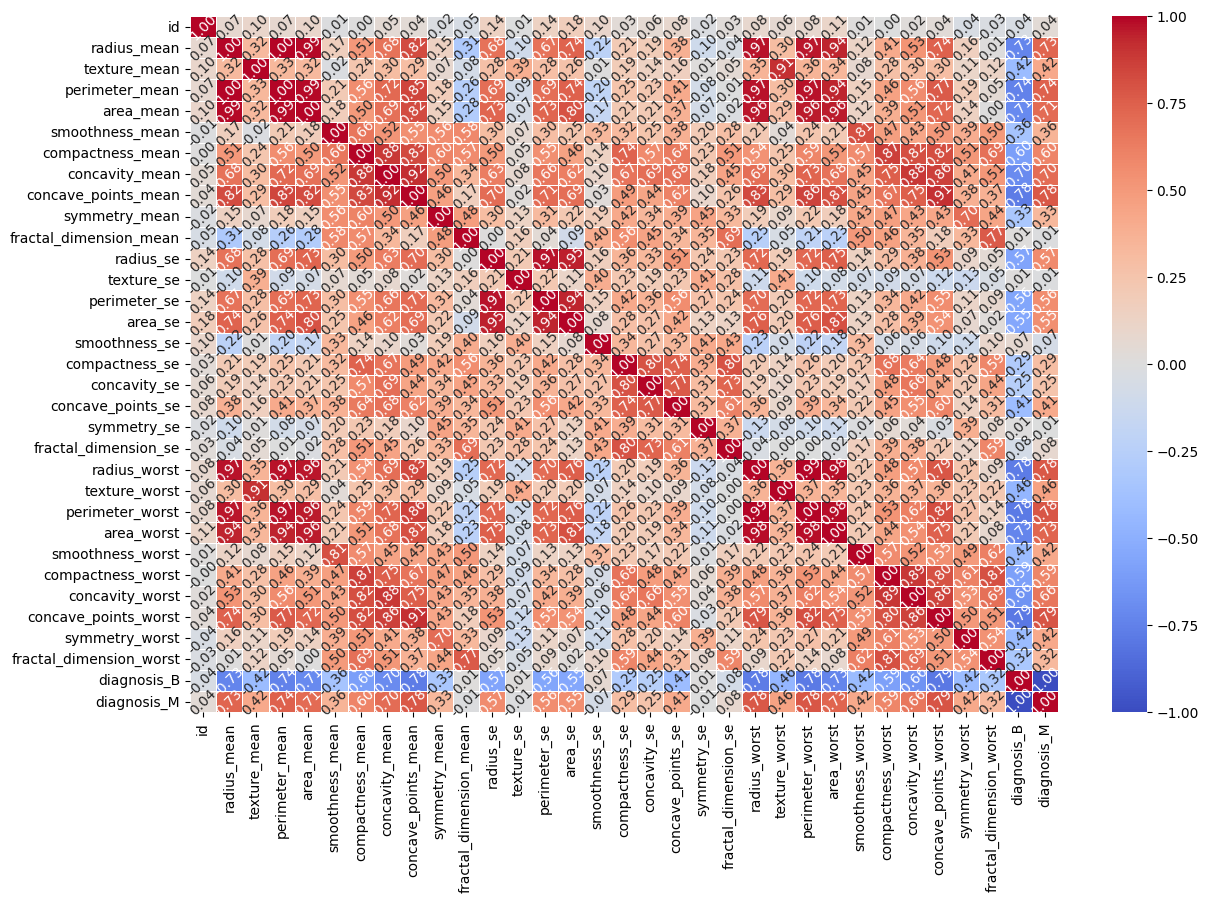

In [ ]:
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"rotation": 45})
plt.subplots_adjust(bottom=0.3)
plt.show()

In [ ]:
#Varias variables tienen una alta correlación entre sí, por lo que vamos a estandarizar los datos.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df_estandar = scaler.fit_transform(df)

In [ ]:
df_estandar = pd.DataFrame(df_estandar, columns = df.columns)

In [ ]:
df_estandar

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,-1.297676,1.297676
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,-1.297676,1.297676
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,-1.297676,1.297676
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-1.297676,1.297676
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,-1.297676,1.297676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235732,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,-1.297676,1.297676
565,-0.235730,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,-1.297676,1.297676
566,-0.235727,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,-1.297676,1.297676
567,-0.235725,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,-1.297676,1.297676


##3.Hipótesis nula de los coeficientes de regresión. Estadístico de prueba, distribución del estadístico de prueba.
Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.


$H0:$ Los coeficientes de regresión son todos iguales a cero, lo que significa que las variables independientes no tienen un efecto significativo en la variable dependiente.

$H1:$ Al menos un coeficiente de regresión lineal es diferente de cero, lo que significa que al menos una variable independiente tiene un efecto significativo en la variable dependiente.

In [ ]:
modelo = smf.ols(formula = 'radius_mean~texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + concave_points_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + perimeter_se + area_se + smoothness_se + compactness_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + radius_worst + texture_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + concavity_worst + concave_points_worst + symmetry_worst + fractal_dimension_worst + diagnosis_B + diagnosis_M', data = entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.787e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:26:24   Log-Likelihood:                 1245.2
No. Observations:                 455   AIC:                            -2428.
Df Residuals:                     424   BIC:                            -2301.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
#Variables regresoras, excluyendo 'radius_mean'
X = df.drop(['radius_mean'], axis=1)

#Variable dependiente
y = df['radius_mean']

X = sm.add_constant(X)

#Ajuste del modelo de regresión lineal usando OLS
model = sm.OLS(y, X).fit()

In [ ]:
#Número de observaciones (n) y el número de coeficientes (k)
n = modelo.nobs
k = modelo.df_model

print("Número de observaciones (n):", n)
print("Número de coeficientes (k):", k)

Número de observaciones (n): 455.0
Número de coeficientes (k): 30.0


In [ ]:
#Grados de libertad
gl = n - k - 1

#Nivel de confianza (1 - alpha)
#confianza = 0.95
alpha = 0.05

In [ ]:
#Valor crítico de la distribución t
vc = stats.t.ppf(1 - alpha/2, gl)

x_range = np.linspace(-8, 8, 500)

#Distribución t
y = stats.t.pdf(x_range, gl)

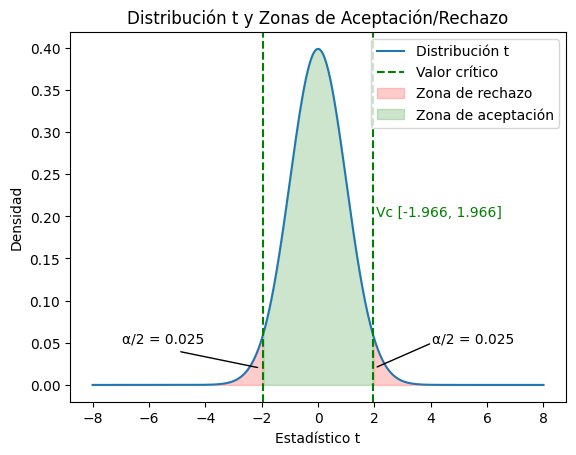

In [ ]:
#Estadístico de prueba
plt.plot(x_range, y, label='Distribución t')

plt.axvline(x=vc, color='green', linestyle='dashed', label='Valor crítico')
plt.axvline(x=-vc, color='green', linestyle='dashed')

plt.fill_between(x_range, y, where=(x_range > vc), color='red', alpha=0.2, label='Zona de rechazo')
plt.fill_between(x_range, y, where=(x_range < -vc), color='red', alpha=0.2)
plt.fill_between(x_range, y, where=(x_range > -vc) & (x_range < vc), color='green', alpha=0.2, label='Zona de aceptación')

plt.xlabel('Estadístico t')
plt.ylabel('Densidad')

plt.legend()
plt.title('Distribución t y Zonas de Aceptación/Rechazo')
plt.text(alpha + 4.0, 0.05, f'α/2 = {alpha/2}', color='black')
plt.annotate('', xy=(alpha + 4, 0.05), xytext=(vc + 0.04, 0.02), arrowprops=dict(arrowstyle='-', color='black'))

plt.text(alpha + -7.0, 0.05, f'α/2 = {alpha/2}', color='black')
plt.annotate('', xy=(-alpha - 2.0, 0.02), xytext=(-vc - 3.0, 0.04), arrowprops=dict(arrowstyle='-', color='black'))
plt.text(vc + 0.1, 0.2, f'Vc [-{vc:.3f}, {vc:.3f}]', color='green')

plt.show()

Según la tabla de Ordinary Least Squares (OLS):

$T = 0.591$

Adicionalmente, con un 95% de confianza tenemos un intervalo de confianza en $[-1.96, 1.96]$

$0.591 \in [-1.96, 1.96]$

Dado que el valor t calculado está dentro del intervalo de confianza, se acepta la hipótesis nula.
Lo que significa que las variables independientes no tienen un efecto significativo en la variable dependiente.

$H_1: \mu_= 0$

##4.Hipótesis nula de la significancia del modelo (prueba F-Fisher).
Menciona que distribución tiene el estadístico de prueba con qué número de grados de libertad. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

In [ ]:
#Variables independientes (excluyendo 'radius_mean')
X = df.drop(['radius_mean'], axis=1)

#Variable dependiente
y = df['radius_mean']

X = sm.add_constant(X)

#Ajuste del modelo de regresión lineal usando OLS
modelo = sm.OLS(y, X).fit()

#Valor F
F_statistic = modelo.fvalue
print(f"Estadístico F: {F_statistic}")

Estadístico F: 66115.46544126022


In [ ]:
#Grados de libertad del numerador
gln = k

#Grados de libertad del denominador
gld = n - k - 1

In [ ]:
gln

30.0

In [ ]:
gld

424.0

In [ ]:
alpha

0.05

In [ ]:
#Valor crítico F para un nivel de confianza del 95%
vc = f.ppf(1 - alpha, gln, gld)

x_range = np.linspace(0, 4, 500)
y = f.pdf(x_range, gln, gld)

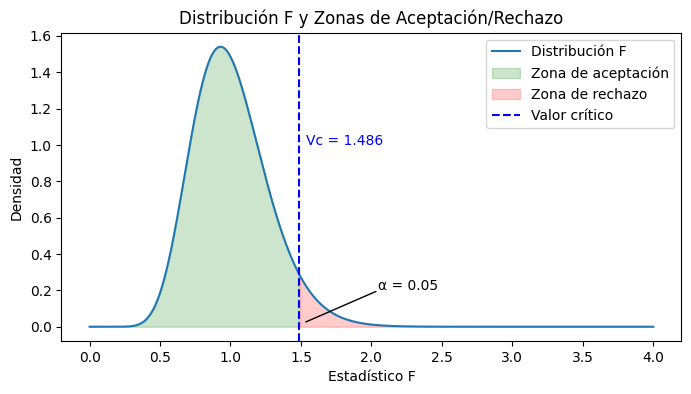

In [ ]:
#Estadístico de prueba
plt.figure(figsize=(8, 4))
plt.plot(x_range, y, label='Distribución F')

plt.fill_between(x_range, 0, y, where=(x_range <= vc), color='green', alpha=0.2, label='Zona de aceptación')
plt.fill_between(x_range, 0, y, where=(x_range > vc), color='red', alpha=0.2, label='Zona de rechazo')


plt.axvline(x=vc, color='blue', linestyle='dashed', label='Valor crítico')
plt.xlabel('Estadístico F')
plt.ylabel('Densidad')
plt.title('Distribución F y Zonas de Aceptación/Rechazo')
plt.legend()

plt.text(vc + 0.05, 1, f'Vc = {vc:.3f}', color='blue')
plt.text(alpha + 2.0, 0.2, f'α = {alpha}', color='black')
plt.annotate('', xy=(alpha + 2, 0.2), xytext=(vc + 0.03, 0.02), arrowprops=dict(arrowstyle='-', color='black'))

plt.show()

En este caso, se tienen los siguientes valores:
  
    Valor crítico: 1.473
    alpha: 0.05
    P-valor: 0.555
    F: 66115.46544126022

F es mayor que el valor crítico, entonces rechazamos la hiótesis nula.
$66115.47 > 1.473$, lo que sugiere un efecto significativo de al menos una variable independiente.

Si el p-valor es menor que alpha, entonces aceptamos la hipótesis nula, en este caso, $0.555 > 0.05$, lo que indica que no hay evidencia suficiente para rechazar la hipótesis nula.

Debido a que el estadístico F es mucho mayor que el valor crítico, podría haber suficiente evidencia para sugerir que al menos una variable independiente tiene un efecto significativo, a pesar de que el p-valor no sea menor que alpha.

##5. Realiza un modelo de regresión hacia atrás (backward).
Explica el criterio para ir eliminando variables del modelo.

In [ ]:
entrenamiento, prueba = train_test_split(df_estandar, test_size = 0.20, random_state = 42)

In [ ]:
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_B',
       'diagnosis_M'],
      dtype='object')

Regresion hacia atras: ir quitando las variables de acuerdo a las variables que estan mas dentro de la region de aceptacion

La estrategia es observar el p valor e ir quitando los de p valor mas grande

Definimos un umbral de significancia de **alpha = 0.05** que determinará si una variable se considera significativa o no. Si el valor p de una variable supera este umbral, se considera no significativa.

**Comenzamos con un modelo que incluye todas las variables predictoras disponibles.**

In [ ]:
modelo = smf.ols(formula = 'radius_mean~texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + concave_points_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + perimeter_se + area_se + smoothness_se + compactness_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + radius_worst + texture_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + concavity_worst + concave_points_worst + symmetry_worst + fractal_dimension_worst + diagnosis_B + diagnosis_M', data = entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

# 0.555 es la suma del area de ambas colas

#Variable menos significativa:
#Quitamos texture_se, con un P-valor de 0.954

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.787e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:26:25   Log-Likelihood:                 1245.2
No. Observations:                 455   AIC:                            -2428.
Df Residuals:                     424   BIC:                            -2301.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula = 'radius_mean~texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + concave_points_mean + symmetry_mean + fractal_dimension_mean + radius_se + perimeter_se + area_se + smoothness_se + compactness_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + radius_worst + texture_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + concavity_worst + concave_points_worst + symmetry_worst + fractal_dimension_worst + diagnosis_B + diagnosis_M', data = entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

# 0.555 es la suma del area de ambas colas

#Variable menos significativa:
#Quitamos texture_worst, con un P-valor de 0.853

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.000e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:26:25   Log-Likelihood:                 1245.2
No. Observations:                 455   AIC:                            -2430.
Df Residuals:                     425   BIC:                            -2307.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula = 'radius_mean~texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + concave_points_mean + symmetry_mean + fractal_dimension_mean + radius_se + perimeter_se + area_se + smoothness_se + compactness_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + radius_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + concavity_worst + concave_points_worst + symmetry_worst + fractal_dimension_worst + diagnosis_B + diagnosis_M', data = entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

# 0.554 es la suma del area de ambas colas

#Variable menos significativa:
#Quitamos concavity_worst, con un P-valor de 0.809

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.229e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:26:25   Log-Likelihood:                 1245.2
No. Observations:                 455   AIC:                            -2432.
Df Residuals:                     426   BIC:                            -2313.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula = 'radius_mean~texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + concave_points_mean + symmetry_mean + fractal_dimension_mean + radius_se + perimeter_se + area_se + smoothness_se + compactness_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + radius_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + concave_points_worst + symmetry_worst + fractal_dimension_worst + diagnosis_B + diagnosis_M', data = entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

# 0.550 es la suma del area de ambas colas

#Variable menos significativa:
#Quitamos concave_points_mean, con un P-valor de 0.710

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.474e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:26:25   Log-Likelihood:                 1245.2
No. Observations:                 455   AIC:                            -2434.
Df Residuals:                     427   BIC:                            -2319.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula = 'radius_mean~texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + symmetry_mean + fractal_dimension_mean + radius_se + perimeter_se + area_se + smoothness_se + compactness_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + radius_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + concave_points_worst + symmetry_worst + fractal_dimension_worst + diagnosis_B + diagnosis_M', data = entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

# 0.538 es la suma del area de ambas colas

#Variable menos significativa:
#Quitamos concave_points_worst, con un P-valor de 0.721

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.736e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:26:26   Log-Likelihood:                 1245.1
No. Observations:                 455   AIC:                            -2436.
Df Residuals:                     428   BIC:                            -2325.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula = 'radius_mean~texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + symmetry_mean + fractal_dimension_mean + radius_se + perimeter_se + area_se + smoothness_se + compactness_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + radius_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + symmetry_worst + fractal_dimension_worst + diagnosis_B + diagnosis_M', data = entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

# 0.541 es la suma del area de ambas colas

#Variable menos significativa:
#Quitamos area_se, con un P-valor de 0.483

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.020e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:26:26   Log-Likelihood:                 1245.0
No. Observations:                 455   AIC:                            -2438.
Df Residuals:                     429   BIC:                            -2331.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula = 'radius_mean~texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + symmetry_mean + fractal_dimension_mean + radius_se + perimeter_se + smoothness_se + compactness_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + radius_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + symmetry_worst + fractal_dimension_worst + diagnosis_B + diagnosis_M', data = entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

# 0.533 es la suma del area de ambas colas

#Variable menos significativa:
#Quitamos smoothness_se, con un P-valor de 0.464

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.321e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:26:26   Log-Likelihood:                 1244.8
No. Observations:                 455   AIC:                            -2440.
Df Residuals:                     430   BIC:                            -2337.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula = 'radius_mean~texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + symmetry_mean + fractal_dimension_mean + radius_se + perimeter_se + compactness_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + radius_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + symmetry_worst + fractal_dimension_worst + diagnosis_B + diagnosis_M', data = entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

# 0.536 es la suma del area de ambas colas

#Variable menos significativa:
#Quitamos compactness_se, con un P-valor de 0.507

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.648e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:26:26   Log-Likelihood:                 1244.5
No. Observations:                 455   AIC:                            -2441.
Df Residuals:                     431   BIC:                            -2342.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula = 'radius_mean~texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + symmetry_mean + fractal_dimension_mean + radius_se + perimeter_se + compactness_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + radius_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + symmetry_worst + fractal_dimension_worst + diagnosis_B + diagnosis_M', data = entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

# 0.536 es la suma del area de ambas colas

#Variable menos significativa:
#Quitamos fractal_dimension_worst, con un P-valor de 0.366

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.648e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:26:26   Log-Likelihood:                 1244.5
No. Observations:                 455   AIC:                            -2441.
Df Residuals:                     431   BIC:                            -2342.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
modelo = smf.ols(formula = 'radius_mean~texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + symmetry_mean + fractal_dimension_mean + radius_se + perimeter_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + radius_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + symmetry_worst + diagnosis_B + diagnosis_M', data = entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

# 0.544 es la suma del area de ambas colas

#Variable menos significativa:
#Quitamos diagnosis_B, con un P-valor de 0.325
#y quitamos diagnosis_M, con un P-valor de 0.325

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.395e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:26:26   Log-Likelihood:                 1244.0
No. Observations:                 455   AIC:                            -2444.
Df Residuals:                     433   BIC:                            -2353.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [ ]:
modelo = smf.ols(formula = 'radius_mean~texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + symmetry_mean + fractal_dimension_mean + radius_se + perimeter_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + radius_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + symmetry_worst', data = entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

# 0.559 es la suma del area de ambas colas

#Variable menos significativa:
#Quitamos radius_se, con un P-valor de 0.094

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.815e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:26:26   Log-Likelihood:                 1243.4
No. Observations:                 455   AIC:                            -2445.
Df Residuals:                     434   BIC:                            -2358.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [ ]:
modelo = smf.ols(formula = 'radius_mean~texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + symmetry_mean + fractal_dimension_mean + perimeter_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + radius_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + symmetry_worst', data = entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

# 0.569 es la suma del area de ambas colas

#Variable menos significativa:
#Quitamos texture_mean, con un P-valor de 0.082

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.241e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:26:26   Log-Likelihood:                 1242.0
No. Observations:                 455   AIC:                            -2444.
Df Residuals:                     435   BIC:                            -2362.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [ ]:
modelo = smf.ols(formula = 'radius_mean~perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + symmetry_mean + fractal_dimension_mean + perimeter_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + radius_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + symmetry_worst', data = entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

# 0.539 es la suma del area de ambas colas

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.709e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:26:26   Log-Likelihood:                 1240.4
No. Observations:                 455   AIC:                            -2443.
Df Residuals:                     436   BIC:                            -2364.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

**Todas las variables restantes tienen un p-valor igual o menor a 0.05.**

**Podemos decir que las variables restantes en el modelo son significativas**

##6.Comparación entre datos reales y predicción. Análisis de los resultados.

In [ ]:
y = y[:500]
predictions = predictions[:500]
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y, predictions)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y, predictions)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

Error Cuadrático Medio (MSE): 3199.0327042575495
Coeficiente de Determinación (R^2): -15379.51572364512


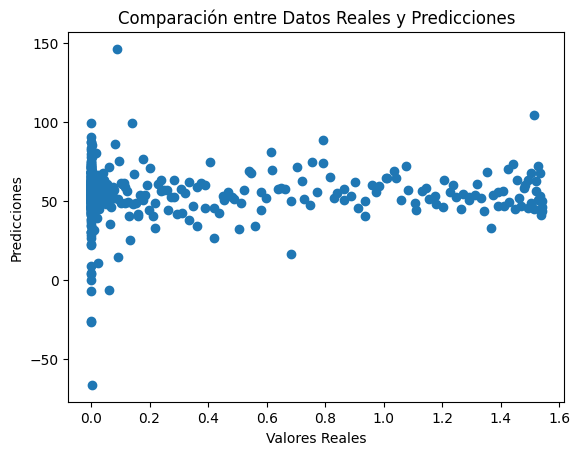

In [ ]:
# Gráfico de dispersión de datos reales vs. predicciones
plt.scatter(y, predictions)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre Datos Reales y Predicciones")

plt.show()